In [1]:
#4ºEtapa: Análise Cluster com o método GMM

In [2]:
#O Objetivo e realizar a clusterização com outro método e comparar. 

In [3]:
#Improtação dos pacotes
import pandas as pd
import numpy as np
import plotly.express as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

In [4]:
dataset = pd.read_csv("dataset_tratado.csv", sep =",")

In [5]:
dataset.head(2)

,ID,Age,AgeClass,Education,MaritalStatus,Children,Income,IncomeClass,Wines,Fruits,Meat,Fish,Sweet,Gold,TotalExpense,NumWeb,NumCatalog,NumStore,Cmp1,Cmp2
0,5524,68,BB-Others,Graduation,Single,0,58138.0,Medium,635,88,546,172,88,88,1617,8,10,4,0,0
1,2174,71,BB-Others,Graduation,Single,2,46344.0,Low,11,1,6,2,1,6,27,1,1,2,0,0


In [6]:
#Transformação de código das variáveis a valores numéricos. 

In [7]:
le = LabelEncoder()
dataset["IncomeClass"] = le.fit_transform(dataset["IncomeClass"])
dataset["AgeClass"] = le.fit_transform(dataset["AgeClass"])
dataset["Education"] = le.fit_transform(dataset["Education"])
dataset["MaritalStatus"] = le.fit_transform(dataset["MaritalStatus"])

In [8]:
#estudo da normalidade

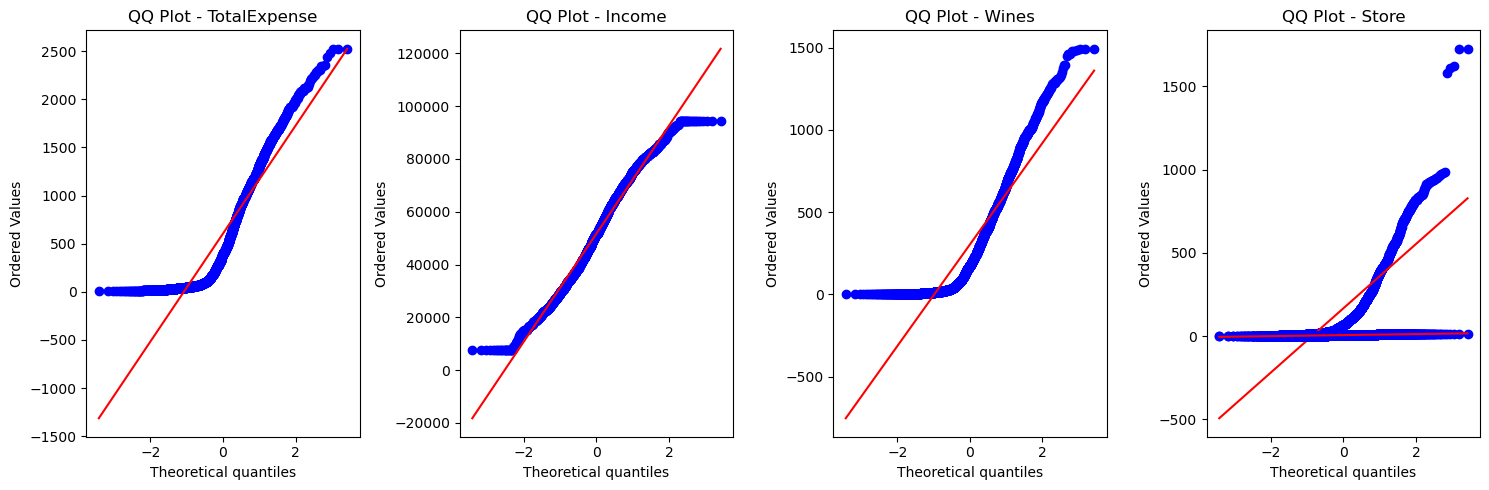

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
stats.probplot(dataset["TotalExpense"], dist="norm", plot=axes[0])
axes[0].set_title("QQ Plot - TotalExpense")
stats.probplot(dataset["Income"], dist="norm", plot=axes[1])
axes[1].set_title("QQ Plot - Income")
stats.probplot(dataset["Wines"], dist="norm", plot=axes[2])
axes[2].set_title("QQ Plot - Wines")
stats.probplot(dataset["Meat"], dist="norm", plot=axes[3])
axes[3].set_title("QQ Plot - Meat")
stats.probplot(dataset["NumStore"], dist="norm", plot=axes[3])
axes[3].set_title("QQ Plot - Store")
plt.tight_layout()
plt.show()

In [10]:
#algumas variáveis não aportavam valores consideráveis para a análise (desvio padrão era 0), por tanto foram removidas da análises. 

In [11]:
print(dataset[["Income", "Age", "Education", "Wines", "Meat", "Fruits", "Gold", "Sweet", "Fish", "NumWeb", "NumStore", "NumCatalog","Cmp1", "Cmp2"]].std())

Income        20592.869806
Age              11.701917
Education         1.122758
Wines           336.574382
Meat            225.661158
Fruits           39.715972
Gold             52.054318
Sweet            41.293949
Fish             54.639909
NumWeb            2.779461
NumStore          3.250940
NumCatalog        2.923456
Cmp1              0.245469
Cmp2              0.115052
dtype: float64


In [12]:
# Selecionando e normalizando os dados
columns = ["Income", "Age", "Education", "Wines", "Meat", "Fruits", "Gold", "Sweet", "Fish", "NumWeb", "NumStore", "NumCatalog"]
X = dataset[columns]
pt = PowerTransformer(method="yeo-johnson")
X_transformed = pt.fit_transform(X)

In [13]:
#Com  relação a variabilidade explicada pelos componentes o valor foi o mesmo 68.7%. 

In [14]:
# Reduzindo para 2 dimensões com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed)
print(pca.explained_variance_ratio_)
# Adicionando as componentes principais ao dataset
dataset['PCA1'] = X_pca[:, 0]
dataset['PCA2'] = X_pca[:, 1]

[0.55657262 0.13007109]


In [15]:
dataset.head(2)

,ID,Age,AgeClass,Education,MaritalStatus,Children,Income,IncomeClass,Wines,Fruits,...,Sweet,Gold,TotalExpense,NumWeb,NumCatalog,NumStore,Cmp1,Cmp2,PCA1,PCA2
0,5524,68,0,2,2,0,58138.0,2,635,88,...,88,88,1617,8,10,4,0,0,-3.49774,0.536081
1,2174,71,0,2,2,2,46344.0,1,11,1,...,1,6,27,1,1,2,0,0,2.97805,-0.496285


In [16]:
#Aplicando GMM (2 clusters)
gmm = GaussianMixture(n_components=2, random_state=42)
clusters = gmm.fit_predict(X_pca)
labels = gmm.fit_predict(X_pca)
# Adicionar o resultado ao dataset
dataset['GMM_Cluster'] = clusters

#Resumo das médias por cluster
cluster_summary = dataset.groupby('GMM_Cluster')[columns].mean()

C:\Users\gsous\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\gsous\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


In [17]:
dataset.head(2)

,ID,Age,AgeClass,Education,MaritalStatus,Children,Income,IncomeClass,Wines,Fruits,...,Gold,TotalExpense,NumWeb,NumCatalog,NumStore,Cmp1,Cmp2,PCA1,PCA2,GMM_Cluster
0,5524,68,0,2,2,0,58138.0,2,635,88,...,88,1617,8,10,4,0,0,-3.49774,0.536081,1
1,2174,71,0,2,2,2,46344.0,1,11,1,...,6,27,1,1,2,0,0,2.97805,-0.496285,0


In [18]:
print(cluster_summary)

                   Income        Age  Education       Wines        Meat  \
GMM_Cluster                                                               
0            34632.326498  53.379512   2.270244   43.235122   27.029268   
1            66201.149340  58.397690   2.500825  524.523102  285.221122   

                Fruits       Gold      Sweet       Fish    NumWeb  NumStore  \
GMM_Cluster                                                                   
0             4.266341  15.062439   4.925854   6.025366  2.162927  3.162927   
1            44.879538  68.415017  45.795380  64.160891  5.714521  8.019802   

             NumCatalog  
GMM_Cluster              
0              0.577561  
1              4.425743  


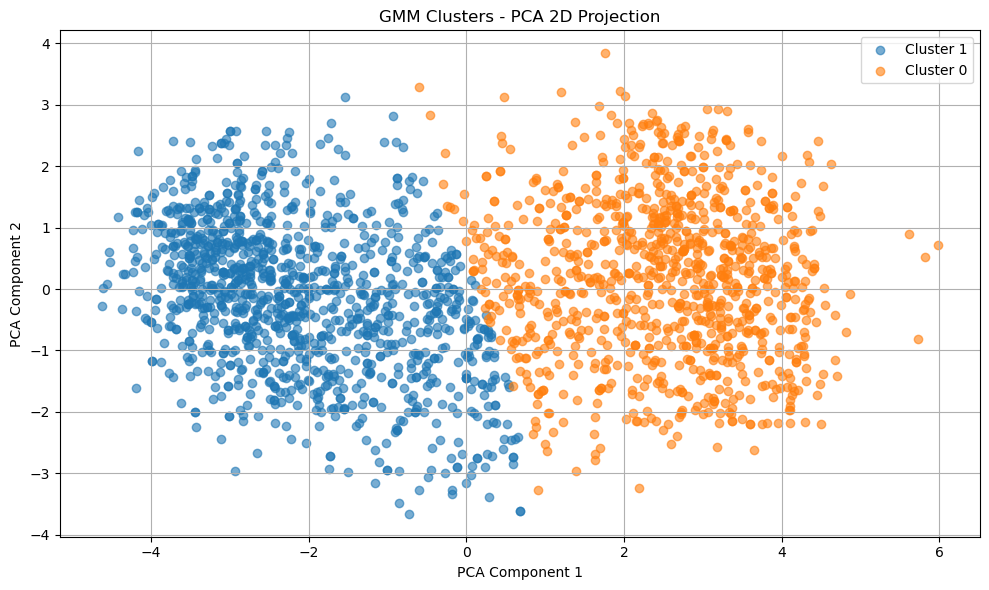

In [19]:
#Plotar os clusters
plt.figure(figsize=(10, 6))
for cluster in dataset['GMM_Cluster'].unique():
    subset = dataset[dataset['GMM_Cluster'] == cluster]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}', alpha=0.6)

#Grafico componentes 
plt.title('GMM Clusters - PCA 2D Projection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
#Contagem de dados por cluster
df_labels = pd.DataFrame(clusters, columns=["Cluster"])
cluster_counts = df_labels.value_counts().reset_index()
cluster_counts.columns = ["Cluster", "Quantidade"]

print("Distribuição de dados por cluster (GMM):")
print(cluster_counts)

Distribuição de dados por cluster (GMM):
   Cluster  Quantidade
0        1        1212
1        0        1025


In [21]:
#Métrica Log-Likelihood

In [22]:
# Calcular log-likelihood total
log_likelihood = gmm.score(X_pca) * len(X)
print(f"Log-Likelihood total: {log_likelihood:.2f}")

Log-Likelihood total: -8542.70


In [23]:
#Média geral de cada variável
global_mean = cluster_summary.mean()

#Função para identificar variáveis relevantes em um cluster
def get_relevant_features(cluster_row, threshold=1.2):
    high_vars = []
    low_vars = []
    for col in cluster_row.index:
        cluster_val = cluster_row[col]
        mean_val = global_mean[col]

        if cluster_val > mean_val * threshold:
            high_vars.append(col)
        elif cluster_val < mean_val / threshold:
            low_vars.append(col)
    
    return high_vars, low_vars

#Tabela descritiva
summary = []

for profile_name, row in cluster_summary.iterrows():
    highs, lows = get_relevant_features(row)
    summary.append({
        "Cluster": profile_name,
        "Variáveis em destaque (ALTAS)": ', '.join(highs),
        "Variáveis em destaque (BAIXAS)": ', '.join(lows)
    })

summary_df = pd.DataFrame(summary)

#Tabela
display(summary_df)

,Cluster,Variáveis em destaque (ALTAS),Variáveis em destaque (BAIXAS)
0,0,,"Income, Wines, Meat, Fruits, Gold, Sweet, Fish..."
1,1,"Income, Wines, Meat, Fruits, Gold, Sweet, Fish...",


In [24]:
#Grupo 1, contém 1212 dados, podemos ver que aqui não se agruparam variáveis que tenham relevância para o cluster, apenas variáveis que possuem uma média pequena. 
#Grupo 2, contém 1025 dados, aqui sim, as variáveis como salário e produtos, que não tinham importância para o cluster anterior, parecem neste grupo. 

In [25]:
#Reduzindo para 2 dimensões com PCA
pca1 = PCA(n_components=2)
X_pca1 = pca1.fit_transform(X_transformed)
print(pca1.explained_variance_ratio_)
# Adiciona as componentes principais ao dataset
dataset['PCA1'] = X_pca1[:, 0]
dataset['PCA2'] = X_pca1[:, 1]

[0.55657262 0.13007109]


In [26]:
dataset.head(2)

,ID,Age,AgeClass,Education,MaritalStatus,Children,Income,IncomeClass,Wines,Fruits,...,Gold,TotalExpense,NumWeb,NumCatalog,NumStore,Cmp1,Cmp2,PCA1,PCA2,GMM_Cluster
0,5524,68,0,2,2,0,58138.0,2,635,88,...,88,1617,8,10,4,0,0,-3.49774,0.536081,1
1,2174,71,0,2,2,2,46344.0,1,11,1,...,6,27,1,1,2,0,0,2.97805,-0.496285,0


In [27]:
#Aplicando GMM considerando 4 clusters.

In [28]:
gmm = GaussianMixture(n_components=4, random_state=42)
clusters1 = gmm.fit_predict(X_pca1)
labels1 = gmm.fit_predict(X_pca1)

#Adicionando o resultado ao dataset
dataset['GMM_Cluster'] = clusters1

#Resumo das médias por cluster
cluster_summary1 = dataset.groupby('GMM_Cluster')[columns].mean()

C:\Users\gsous\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\gsous\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


In [29]:
dataset.head(5)

,ID,Age,AgeClass,Education,MaritalStatus,Children,Income,IncomeClass,Wines,Fruits,...,Gold,TotalExpense,NumWeb,NumCatalog,NumStore,Cmp1,Cmp2,PCA1,PCA2,GMM_Cluster
0,5524,68,0,2,2,0,58138.0,2,635,88,...,88,1617,8,10,4,0,0,-3.497740,0.536081,1
1,2174,71,0,2,2,2,46344.0,1,11,1,...,6,27,1,1,2,0,0,2.978050,-0.496285,2
2,4141,60,0,2,3,0,71613.0,0,426,49,...,42,776,8,2,10,0,0,-2.580777,0.257061,1
3,6182,41,1,2,3,1,26646.0,3,11,4,...,5,53,2,0,4,0,0,2.538609,1.198263,0
4,5324,44,1,4,1,1,58293.0,2,173,43,...,15,422,5,3,6,0,0,-1.300545,-0.091435,3


In [30]:
print(cluster_summary1)

                   Income        Age  Education       Wines        Meat  \
GMM_Cluster                                                               
0            28299.726726  48.091314   1.527840   16.062361   28.550111   
1            72272.662596  57.620823   2.366324  599.524422  382.569409   
2            36985.887631  57.713217   3.019950   33.423940   12.104738   
3            52492.410378  58.993432   2.660099  316.901478   95.371100   

                Fruits       Gold      Sweet       Fish    NumWeb  NumStore  \
GMM_Cluster                                                                   
0             5.995546  17.857461   6.630290   8.298441  1.988864  2.933185   
1            61.934447  79.026992  63.598972  88.128535  5.704370  8.746787   
2             0.930175   6.369077   1.079800   1.563591  1.548628  2.852868   
3            12.343186  43.190476  12.582923  18.098522  5.239737  6.068966   

             NumCatalog  
GMM_Cluster              
0              0.52561

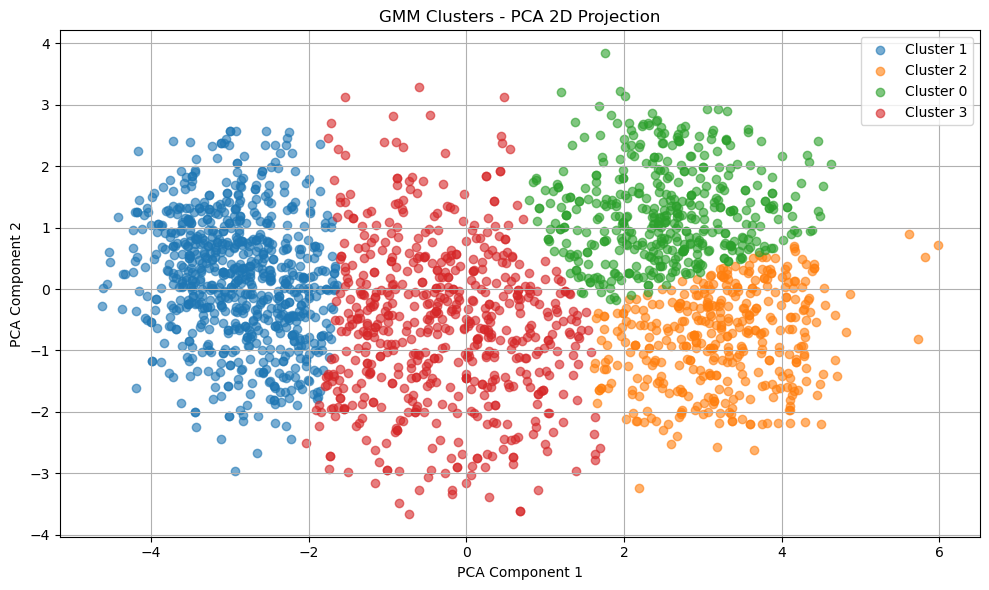

In [31]:
#Plotar os clusters
plt.figure(figsize=(10, 6))
for cluster1 in dataset['GMM_Cluster'].unique():
    subset = dataset[dataset['GMM_Cluster'] == cluster1]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster1}', alpha=0.6)

#Grafico componentes 
plt.title('GMM Clusters - PCA 2D Projection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
#Contagem de dados por cluster
df_labels = pd.DataFrame(clusters1, columns=["Cluster1"])
cluster_counts = df_labels.value_counts().reset_index()
cluster_counts.columns = ["Cluster", "Quantidade"]

print("Distribuição de dados por cluster (GMM):")
print(cluster_counts)

Distribuição de dados por cluster (GMM):
   Cluster  Quantidade
0        1         778
1        3         609
2        0         449
3        2         401


In [33]:
#Métrica log-likelihood
log_likelihood = gmm.score(X_pca1) * len(X)
print(f"Log-Likelihood total: {log_likelihood:.2f}")

Log-Likelihood total: -8384.46


In [34]:
#Média geral de cada variável
global_mean = cluster_summary1.mean()

#Função para identificar variáveis relevantes em um cluster
def get_relevant_features(cluster_row, threshold=1.2):
    high_vars = []
    low_vars = []
    for col in cluster_row.index:
        cluster_val = cluster_row[col]
        mean_val = global_mean[col]

        if cluster_val > mean_val * threshold:
            high_vars.append(col)
        elif cluster_val < mean_val / threshold:
            low_vars.append(col)
    
    return high_vars, low_vars

#Tabela descritiva
summary = []

for profile_name, row in cluster_summary1.iterrows():
    highs, lows = get_relevant_features(row)
    summary.append({
        "Cluster": profile_name,
        "Variáveis em destaque (ALTAS)": ', '.join(highs),
        "Variáveis em destaque (BAIXAS)": ', '.join(lows)
    })

summary_df = pd.DataFrame(summary)

#Tabela
display(summary_df)

,Cluster,Variáveis em destaque (ALTAS),Variáveis em destaque (BAIXAS)
0,0,,"Income, Education, Wines, Meat, Fruits, Gold, ..."
1,1,"Income, Wines, Meat, Fruits, Gold, Sweet, Fish...",
2,2,Education,"Income, Wines, Meat, Fruits, Gold, Sweet, Fish..."
3,3,"Wines, NumWeb","Meat, Fruits, Sweet, Fish"


In [35]:
#Realizando uma nova análise considerando 4 clusters, o primeiro e o segundo são iguais ao anterior com a diferença que cada um possui 778 dados e 609 respectivamente. 
#Grupo 3, contém 449 dados, observamos uma mudança onde a variável nível educacional tem importância para este cluster, enquanto as outras variáveis aparecem sem relevância. 
#Grupo 4, contém 401 dados, as variáveis Wine(vinho) e NumWeb (compras na página web) têm importância para o cluster, os outros produtos são menos importantes. 

In [36]:
#A métrica log-Likelihood para a análises com dois cluster é de é -8542.70, para 4 cluster é de -8384.46. 
#A segunda é um pouco melhor que a primeira, entretanto, não é ideal.

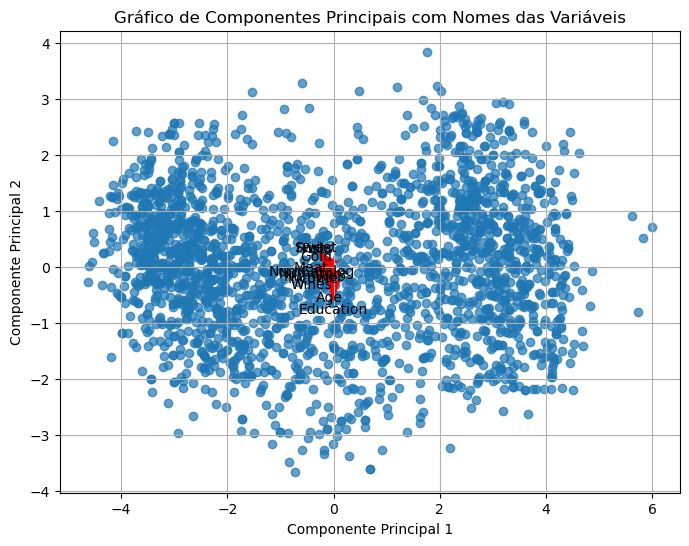

In [37]:
#Grafico com nomes
# Plotar as coordenadas principais
plt.figure(figsize=(8, 6))
plt.scatter(X_pca1[:, 0], X_pca1[:, 1], alpha=0.7)

# Adicionar as variáveis como vetores no gráfico de PCA
dataset_columns = columns
for i, col in enumerate(dataset_columns):
    # Vamos ajustar os vetores das variáveis para não ficarem sobrepostos
    plt.quiver(0, 0, pca.components_[0, i], pca.components_[1, i], angles='xy', scale_units='xy', scale=1.0, color='r')
    # Ajustar o texto para não ficar sobreposto aos vetores
    plt.text(pca.components_[0, i] * 1.2, pca.components_[1, i] * 1.2, col, color='black', ha='center', va='center')

# Título e labels
plt.title('Gráfico de Componentes Principais com Nomes das Variáveis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Exibir o gráfico
plt.grid(True)
plt.show()

In [38]:
# O método AIC-BIC para determinar o números de cluster, indica que deveríamos considerar 8 clusters para agrupar os dados.

C:\Users\gsous\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\gsous\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\gsous\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\gsous\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

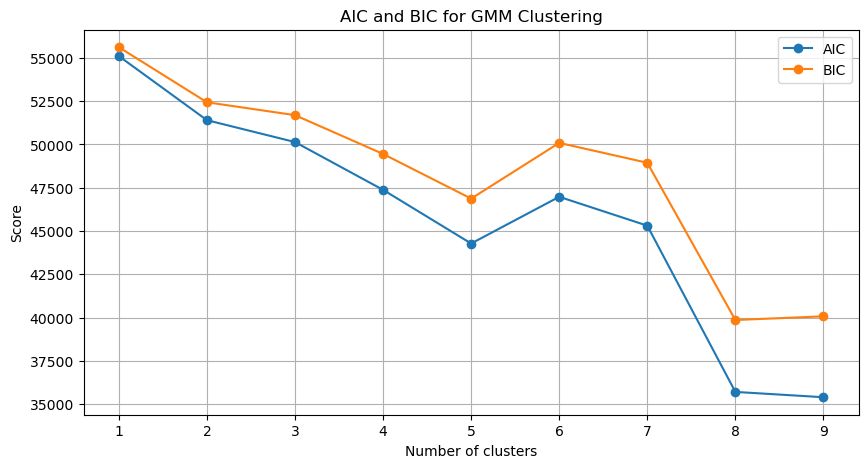

In [39]:
n_components = range(1, 10)
aic_scores = []
bic_scores = []

for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_transformed)
    aic_scores.append(gmm.aic(X_transformed))
    bic_scores.append(gmm.bic(X_transformed))

plt.figure(figsize=(10, 5))
plt.plot(n_components, aic_scores, label='AIC', marker='o')
plt.plot(n_components, bic_scores, label='BIC', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('AIC and BIC for GMM Clustering')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
#Conclusão, os clusters com o método GMM parecem se desenhar da mesma forma que para o métodos k means, entretanto, ao analisar considerando quatro clusters, surgem dois pontos novos:
#1º a variável nível educacional é importante para o terceiro cluster.
#2º A variável Wines(vinho) se relaciona com a variável Num Web (número de compras na página web).

In [41]:
#10.Que campanha seria mais eficaz para impulsionar suas vendas?
#A Campanha deve ser direcionada principalmente para as lojas, promovendo os produtos como carne e vinho. 
#Tendo como objetivo atrair as gerações millenials, Xtemprana e Baby Boomers, que possuem alta renda e estão acostumados a gastar com bons produtos. 
#Também seria interessante utilizar o canal online para divulgá-la e atrair os clientes que compram pela página web.